# Chapter4 画像から特徴量を抽出しよう
まずは必要なライブラリをすべてインポートします。

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## PythonのOpenCVで画像ファイルを読み込んで保存

**読み込み**
`cv2.imread`の第二引数に`cv2.IMREAD_GRAYSCALE`を指定することで、カラーの画像ファイルをグレースケール（白黒）で読み込むことができる。`cv2.IMREAD_GRAYSCALE`は`0`なので、`0`を指定してもOK。

エッジ検出など、色情報が必要ないときに便利。

**書き込み**
ファイルのパスと`ndarray`オブジェクトを引数として指定する。
- `np.ndarray`: N-d Array すなわちN次元配列を扱うためのクラスです。

In [10]:
img = cv2.imread('image/000.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gray000.jpg',img)
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [11]:
print(type(img))
print(img.shape)
print(img.dtype)

<class 'numpy.ndarray'>
(375, 435)
uint8


- `ravel()`: numpyの多次元配列を一次元配列にする。
下記の`print(img.ravel().shape)`では163,125個の要素の一次元配列であることがわかる。

In [12]:
print(img.ravel().shape)

(163125,)


### ヒストグラム
ヒストグラムとは画像中の画素値の全体的な分布を知るためのグラフやプロットのこと。
- 画素値: 点につけた色を数字で表現したもの。フルカラーなら、光の三原色である赤、緑、青それぞれを0～255の256階調で表現。
- グレースケールなら1画素を8ビットで表し、色情報は含まず明るさ情報のみを含む。
    - この8ビット画像では、濃淡を2の8乗＝256階調まで表すことができる。
    - 画素値0が黒、画素値255が白
- 横軸が画素値、縦軸が画素値の出現頻度
#### 参考サイト
- [ヒストグラム その1: 計算して，プロットして，解析する !!!](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html)

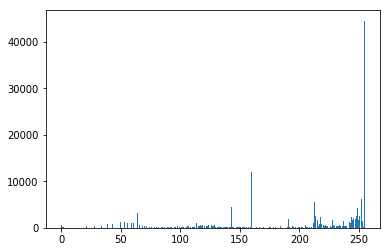

In [33]:
# ヒストグラムを描画し、明るさごとの出現頻度を可視化。
def plot_hist(img):
    img_hist = np.histogram(img.ravel(), 256, [0,256])
    hist = img_hist[0]
    plt.bar(np.arange(256), hist)
    plt.show()
plot_hist(cv2.imread('image/000.jpg', cv2.IMREAD_GRAYSCALE)) # "Kirishima" 1

次は、画像001~002のヒストグラムを描画してみる。"Kirishima"が存在する画像には画素数150前後に目立つ棒がそれぞれ1本あるのがわかる。

000 kirishimaがいる↓


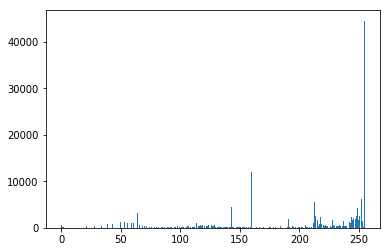

001 kirishimaがいない↓


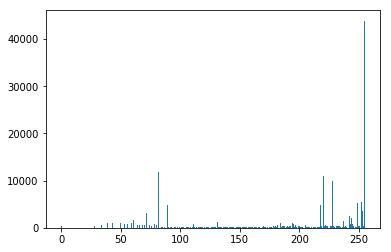

002 kirishimaがいる↓


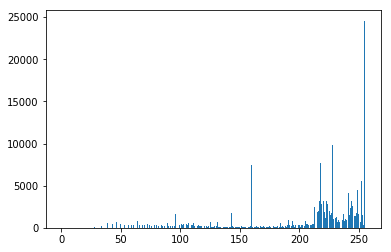

In [35]:
print("000 kirishimaがいる↓")
plot_hist(cv2.imread('image/000.jpg', cv2.IMREAD_GRAYSCALE)) # "Kirishima" 1
print("001 kirishimaがいない↓")
plot_hist(cv2.imread('image/001.jpg', cv2.IMREAD_GRAYSCALE)) # "Kirishima" 0
print("002 kirishimaがいる↓")
plot_hist(cv2.imread('image/002.jpg', cv2.IMREAD_GRAYSCALE)) # "Kirishima" 1

# Chapter5
教師ファイルを表示する。'Kirishima'項目のみ。

In [36]:
targets_data = pd.read_csv('y_classified.csv')
print(targets_data['Kirishima'])

0     1
1     0
2     1
3     0
4     1
5     0
6     0
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    0
24    1
25    1
26    0
27    1
28    1
29    1
     ..
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    0
78    0
79    0
80    0
81    0
82    1
83    1
84    0
85    1
86    1
87    1
88    1
89    0
90    0
91    1
92    1
93    0
94    1
95    1
96    0
97    1
98    1
99    1
Name: Kirishima, Length: 100, dtype: int64


In [16]:
images = []
for i in range(100):
    file = ('image/%03d.jpg'%(i))
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    images.append(img)

In [17]:
images_data = np.empty((100, len(images[0].ravel())), int)
for i in range(100):
    images_data[i] = np.array([images[i].ravel()])

In [18]:
print(images_data.shape)

(100, 163125)


In [19]:
# -4:12
X_train, X_test, y_train, y_test = train_test_split(images_data, targets_data['Kirishima'], random_state = 0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 163125)
(25, 163125)
(75,)
(25,)


In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)

# 教師データXの入力データ(X_train)とそれに対応する期待する出力データy_train
knn.fit(X_train, y_train)
# この時点で学習完了

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
#　分類結果を試してみる
print(knn.predict(np.array([X_test[0]])))
print(y_test)
#　しかしうまくいっていない

[1]
26    0
86    1
2     1
55    0
75    1
93    0
16    1
73    1
54    1
95    1
53    0
92    1
78    0
13    0
7     1
30    0
22    1
24    1
33    0
8     1
43    1
62    1
3     0
71    1
45    0
Name: Kirishima, dtype: int64


In [23]:
# 予測するデータを4つまで増やしてみる。np.arrayの要素に他の予測データを入れる。
print(knn.predict(np.array([X_test[0], X_test[1], X_test[2], X_test[3]])))
print(y_test)

[1 1 1 0]
26    0
86    1
2     1
55    0
75    1
93    0
16    1
73    1
54    1
95    1
53    0
92    1
78    0
13    0
7     1
30    0
22    1
24    1
33    0
8     1
43    1
62    1
3     0
71    1
45    0
Name: Kirishima, dtype: int64


In [24]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0]


In [25]:
# mean()を使って正解率を表示
print(np.mean(y_pred == y_test))

0.6


# Chapter 6
Chapter6では、Chapter5より精度を上げるのが目標。

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

targets_data = pd.read_csv('y_classified.csv')

In [27]:
images_data = np.empty((0,256), int)

for i in range(100):
    jpg = ('image/%03d.jpg' %(i))
    img = cv2.imread(jpg, cv2.IMREAD_GRAYSCALE)
    hist = np.histogram(img.ravel(), 256, [0,256])
    images_data = np.append(images_data, np.array([hist[0]]), axis=0)
    
print(images_data.shape)

(100, 256)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(images_data, targets_data['Kirishima'], random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 256)
(25, 256)
(75,)
(25,)


In [29]:
knn = KNeighborsClassifier(n_neighbors = 1)

# 教師データXの入力データ(X_train)とそれに対応する期待する出力データy_train
knn.fit(X_train, y_train)
# この時点で学習完了

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
#2:16
print(knn.predict(np.array([X_test[0]])))

[1]


In [31]:
print(knn.predict(np.array([X_test[0], X_test[1], X_test[2], X_test[3]])))
print(y_test)

[1 1 1 0]
26    0
86    1
2     1
55    0
75    1
93    0
16    1
73    1
54    1
95    1
53    0
92    1
78    0
13    0
7     1
30    0
22    1
24    1
33    0
8     1
43    1
62    1
3     0
71    1
45    0
Name: Kirishima, dtype: int64


In [32]:
y_pred = knn.predict(X_test)
print(y_pred)
print(np.mean(y_pred == y_test))

[1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0]
0.84
